# 4.모델 훈련(핸즈온 머신러닝)

## 4.1 선형회귀

### 4.1.1 정규방정식

#### 기초 데이터 세팅

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

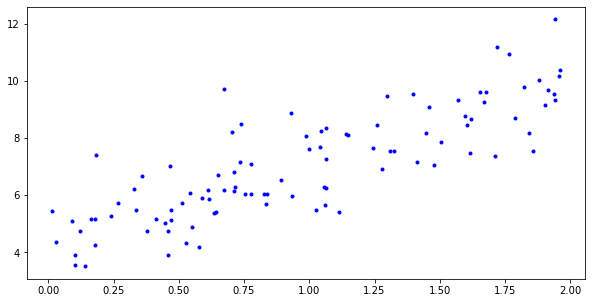

In [31]:
plt.figure(figsize = (10,5))

plt.plot(x, y, 'b.')

plt.show()

In [35]:
x.reshape(-1).shape

(100,)

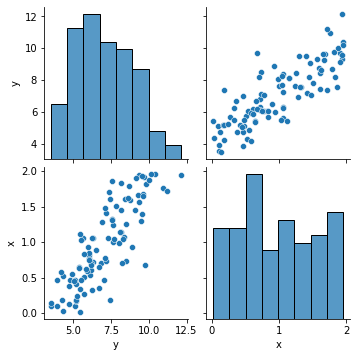

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'y' : y.reshape(-1), 'x' : x.reshape(-1)
}, index = range(0,100))


sns.pairplot(data)
plt.show()

#### 정규방정식 적용

In [37]:
x_b = np.c_[np.ones((100,1)), x] #x데이터에 b0을 추가해줌
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) #(t(x)**x)**t(x)**y

In [38]:
theta_best

array([[4.37420877],
       [2.75993759]])

실제로 나와야 하는 값은 y를 만들때 넣은 절편인 4와 기울기인 3! 
하지만 오차항 때문에 정확한 값은 얻지 못했다


In [39]:
np.array([[0], [2]])

array([[0],
       [2]])

In [40]:
np.ones((2,1))

array([[1.],
       [1.]])

#### 사이킷런 적용

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1,1),y)

LinearRegression()

In [42]:
lin_reg.intercept_

array([4.37420877])

## 4.2 Gradient Descent

In [43]:
x.shape

(100, 1)

In [44]:
x.reshape(-1,1).shape

(100, 1)

In [70]:
#경사하강법의 구현

eta = 0.1 #학습률(에타)
n_iterations = 1000
m = 100

#theta를 초기화
theta = np.random.randn(2,1)
print(theta)

#변수저장
beta0 = list()
beta1 = list()

for iteration in range(n_iterations) : 
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    beta0.append(theta[0][0])
    beta1.append(theta[1][0])

[[-0.88027488]
 [ 0.54584346]]


In [71]:
theta[0][0]

4.374208770014235

In [109]:
#새로운 데이터 생성
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

#파라미터 저장
param = np.array([beta0, beta1])

#행렬곱 생성
sgd_0_1 = x_new_b.dot(param).T


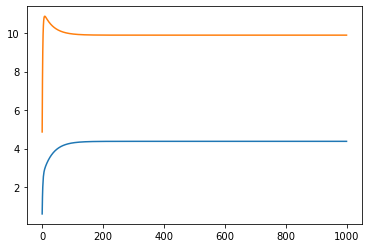

In [111]:
#파라미터가 어디로 수렵하는지 보자
plt.plot(figsize = (10,5))
plt.plot(sgd_0_1)
plt.show()

C:\Users\jiho0\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\jiho0\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\jiho0\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays 

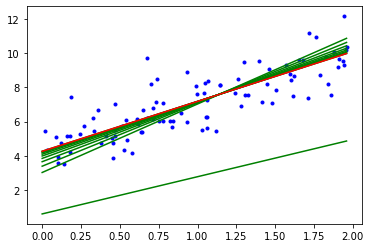

In [120]:
#그래프 그리기
plt.plot(figsize = (15,10))
plt.plot(x,y,'b.')
for i in range(0,100,10):
    plt.plot([0,max(x)],sgd_0_1[i],'g-')
    if i == 90 : 
        plt.plot([0,max(x)],sgd_0_1[i],'r-')

# plt.plot(sgd_0_1[0], 'r-')